# Example `Dysmalpy` 1D fitting, using fitting wrapper

**Includes the following components:**

 - Disk + Bulge
 - NFW halo
 - Constant velocity dispersion

## Setup steps ##

**First import modules**

In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from dysmalpy import fitting
from dysmalpy.fitting_wrappers import dysmalpy_fit_single_1D
from dysmalpy.fitting_wrappers import utils_io

import os

import numpy as np

**Setup notebook**

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import Image

**Set data, output paths**

In [3]:
# Data directory
datadir = '/Users/sedona/data/dysmalpy_example_data/'
#'/YOUR/DATA/PATH/'

# Where to save output files
#outdir  = './output_1D/'
outdir = '/Users/sedona/data/dysmalpy_test_examples/JUPYTER_OUTPUT_1D_FITTING_WRAPPER/'
outdir_mpfit = outdir + 'MPFIT/'

param_filename = '/Users/sedona/data/dysmalpy_test_examples/fitting_1D_mpfit.params'

-------------------

**Settings in parameter file:**

In [4]:
with open(param_filename, 'r') as f:
    print(f.read())

# Example parameters file for fitting a single object with 1D data
# Note: DO NOT CHANGE THE NAMES IN THE 1ST COLUMN AND KEEP THE COMMAS!!
# See README for a description of each parameter and its available options.

# ******************************* OBJECT INFO **********************************
galID,    GS4_43501    # Name of your object
z,        1.613        # Redshift


# ****************************** DATA INFO *************************************

#datadir,          None                       # Optional: Full path to data directory. 
datadir,   /Users/sedona/Dropbox/RCOut_Reinhard/rc_2019_analysis/1D_profiles/

fdata,            GS4_43501.obs_prof.txt     # Full path to your data. Alternatively, just the filename if 'datadir' is set.
data_inst_corr,   True                       # Is the dispersion corrected for
                                             # instrumental broadening?
slit_width,       0.55                       # arcsecs
slit_pa,          142.                    

**Add some settings for this notebook example:**

In [5]:
plot_type = 'png'

--------

## Run `Dysmalpy` fitting: 1D wrapper, with fit method= MPFIT ##

In [6]:
dysmalpy_fit_single_1D.dysmalpy_fit_single_1D(param_filename=param_filename, 
                                    datadir=datadir, outdir=outdir_mpfit,
                                    plot_type=plot_type)

INFO:DysmalPy:Making path=/Users/sedona/data/dysmalpy_test_examples/JUPYTER_OUTPUT_1D_FITTING_WRAPPER/MPFIT/
INFO:DysmalPy:*************************************
INFO:DysmalPy: Fitting: GS4_43501 using MPFIT
INFO:DysmalPy:    velocity file: /Users/sedona/data/dysmalpy_example_data/GS4_43501.obs_prof.txt
INFO:DysmalPy:
mvirial_tied: <function tie_lmvirial_NFW at 0x1a22975620>
INFO:DysmalPy:nSubpixels: 3
INFO:DysmalPy:
MPFIT Fitting:
Start: 2020-10-26 21:58:43.111903

INFO:DysmalPy:Iter 1  CHI-SQUARE = 1321.200576  DOF = 31
   disk+bulge:total_mass = 11  
   disk+bulge:r_eff_disk = 5  
   disk+bulge:bt = 0.3  
   halo:fdm = 0.5  
   dispprof:sigma0 = 39  

INFO:DysmalPy:Iter 2  CHI-SQUARE = 427.2094723  DOF = 31
   disk+bulge:total_mass = 11.18491375  
   disk+bulge:r_eff_disk = 5.092320153  
   disk+bulge:bt = 0  
   halo:fdm = 0.2578994459  
   dispprof:sigma0 = 42.79126112  

INFO:DysmalPy:Iter 3  CHI-SQUARE = 81.58211225  DOF = 31
   disk+bulge:total_mass = 10.87049231  
   disk+bulge

------

## Examine results ##

### Result plots ###

**Read in parameter file**

In [7]:
params = utils_io.read_fitting_params(fname=param_filename)

# Override data + output paths:
params['datadir'] = datadir
params['outdir'] = outdir_mpfit

# Add the plot type:
params['plot_type'] = plot_type


f_galmodel = params['outdir'] + '{}_galaxy_model.pickle'.format(params['galID'])
f_results =  params['outdir'] + '{}_{}_results.pickle'.format(params['galID'], 
                                                        params['fit_method'])

**Best-fit plot**

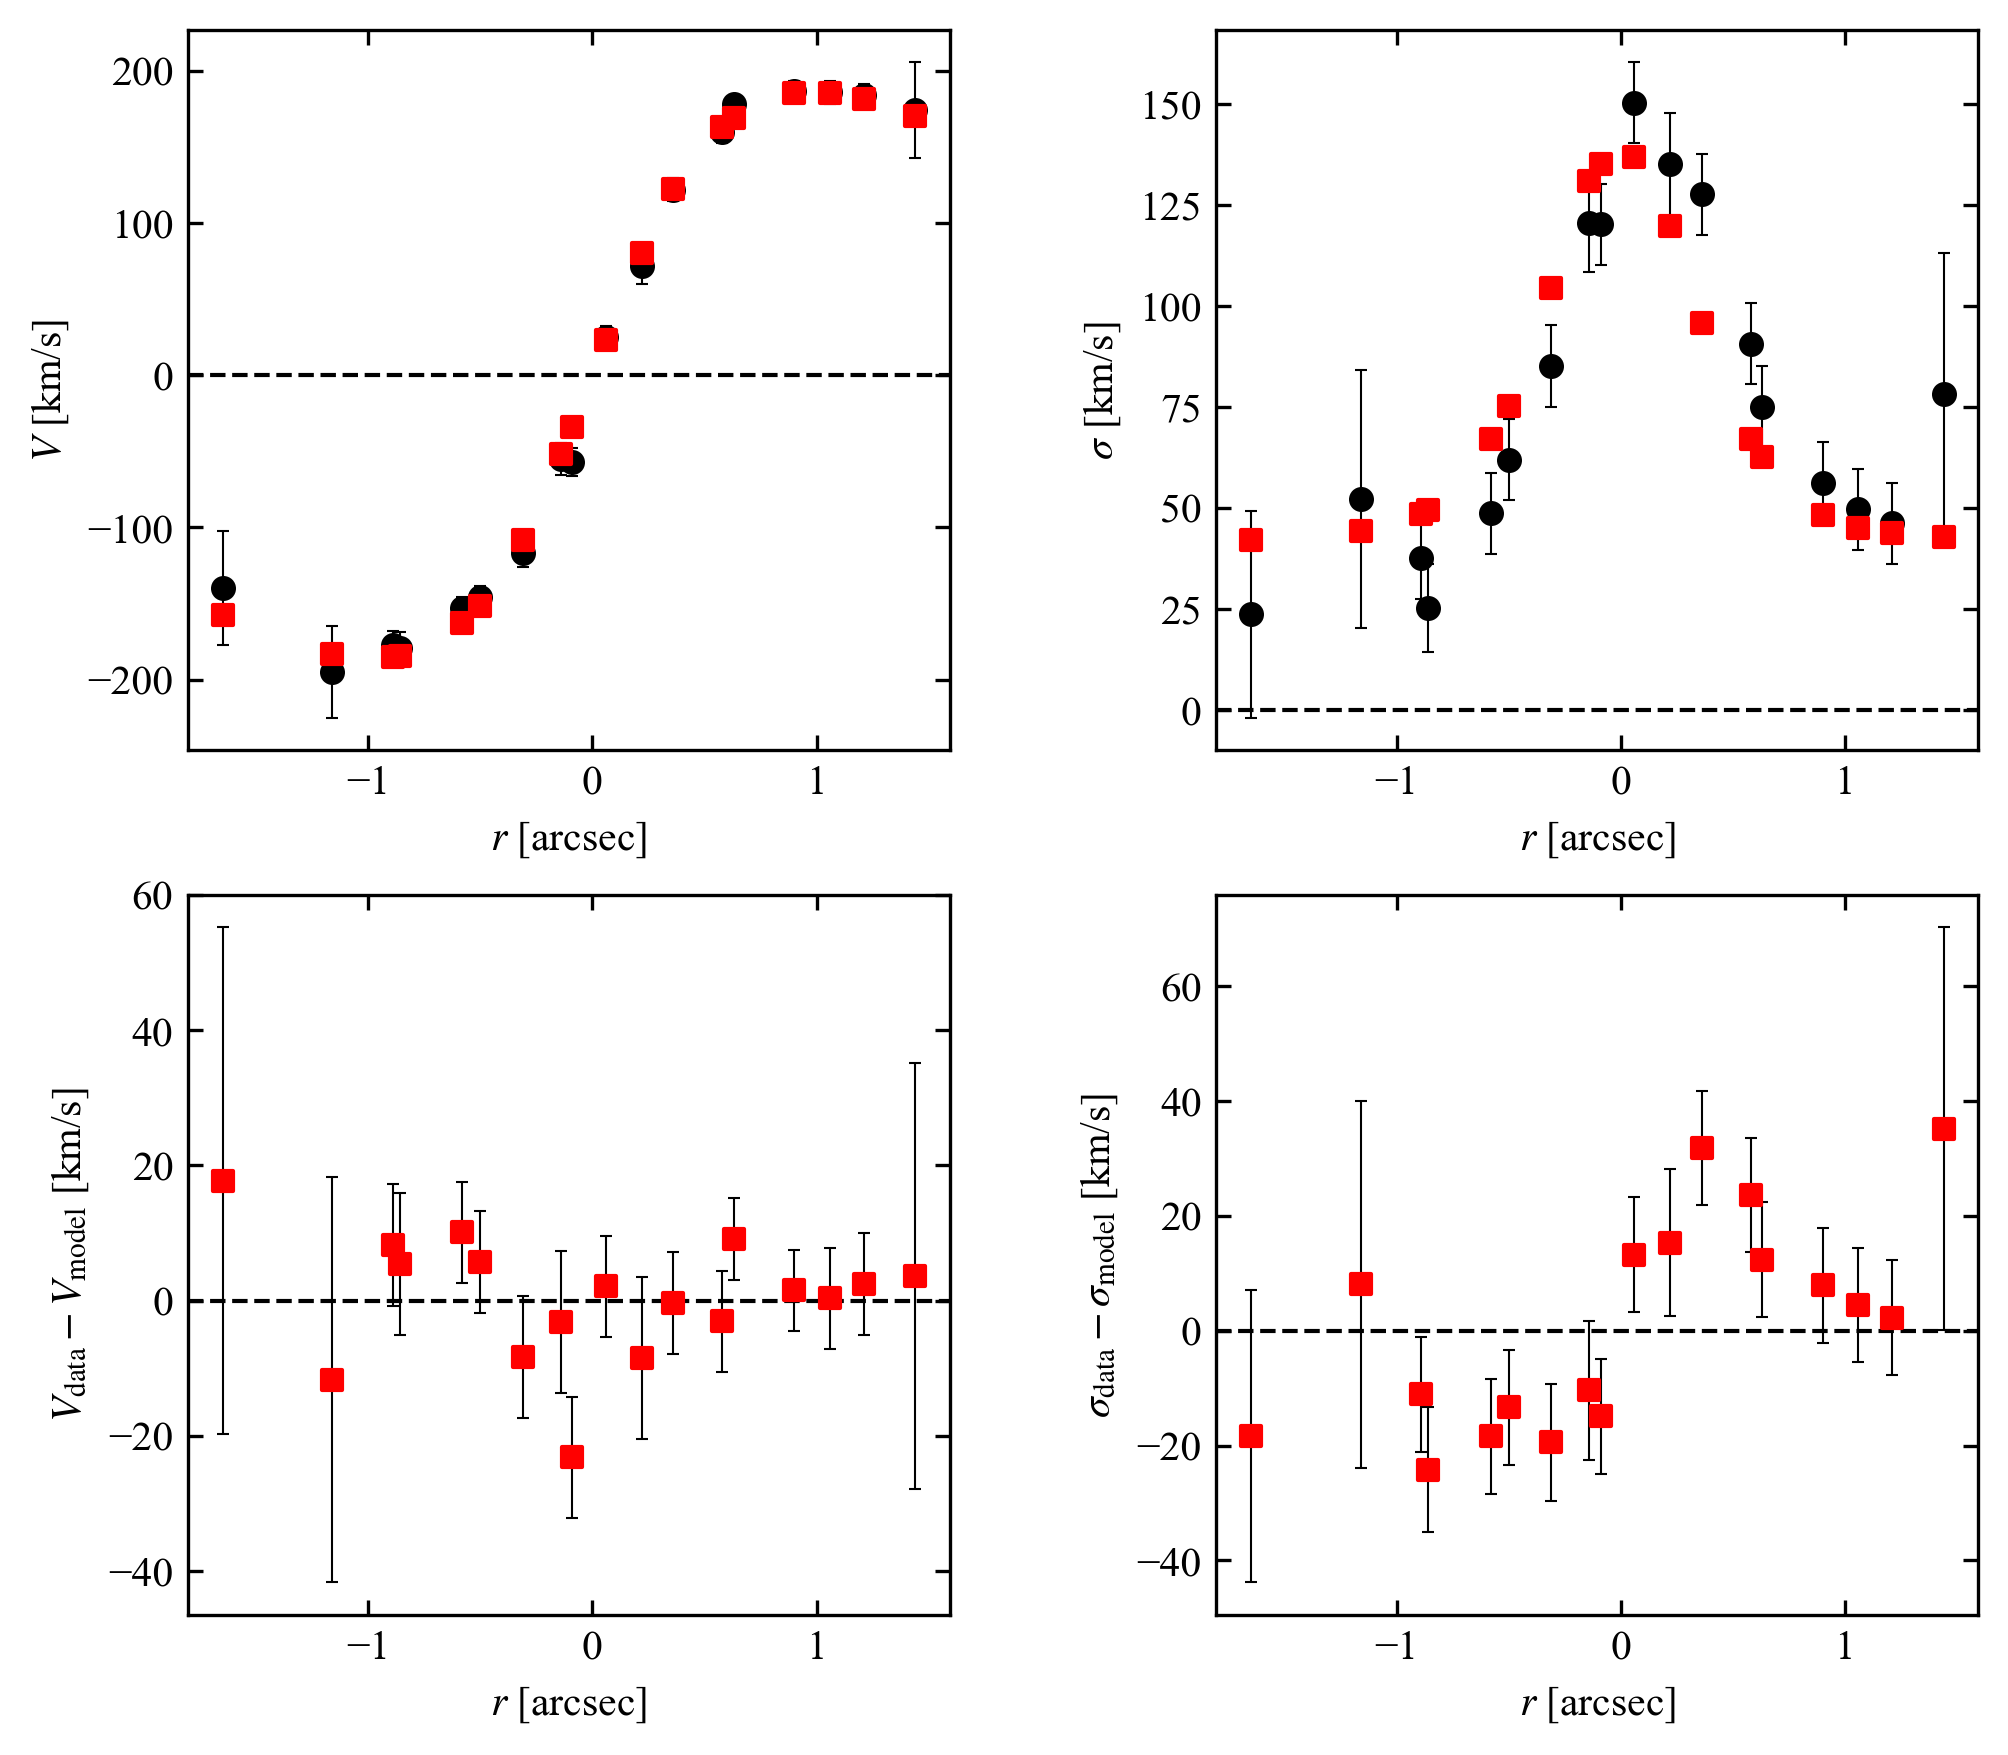

In [8]:
# Look at best-fit saved plot:
filepath = outdir_mpfit+"{}_mpfit_best_fit.{}".format(params['galID'], 
                                                        params['plot_type'])
Image(filename=filepath, width=600)

#### Directly generating result plots ####

**Reload the galaxy, results files:**

In [9]:
gal, results = fitting.reload_all_fitting(filename_galmodel=f_galmodel, 
                        filename_results=f_results, fit_method=params['fit_method'])

**Plot the best-fit results:**

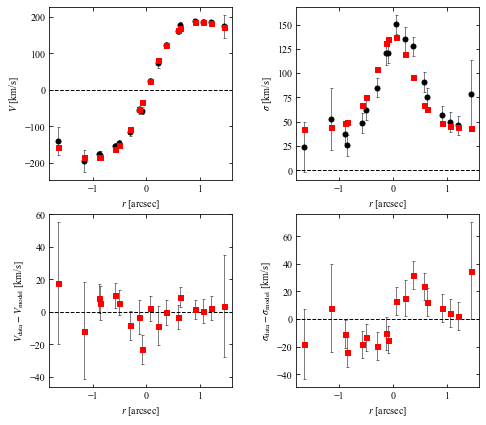

In [10]:
results.plot_results(gal, fitdispersion=params['fitdispersion'], 
                          oversample=params['oversample'], 
                          oversize=params['oversize'])

### Results reports ###

We now look at the results reports, which include the best-fit values and uncertainties (as well as other fitting settings and output).

In [11]:
# Print report
print(results.results_report(gal=gal))

###############################
 Fitting for GS4_43501

Date: 2020-10-26 22:02:51.483594

Datafile: /Users/sedona/data/dysmalpy_example_data/GS4_43501.obs_prof.txt

Fitting method: MPFIT

profile1d_type: circ_ap_cube
moment_calc: False
partial_weight: True
pressure_support_type: 1

###############################
 Fitting results
-----------
 disk+bulge
    total_mass       10.9167  +/-   0.1210
    r_eff_disk        3.3990  +/-   0.6306
    bt                0.0115  +/-   0.0423

    n_disk            1.0000  [FIXED]
    r_eff_bulge       1.0000  [FIXED]
    n_bulge           4.0000  [FIXED]
-----------
 halo
    fdm               0.1245  +/-   0.0833

    mvirial          11.5247  [TIED]
    conc              5.0000  [FIXED]
-----------
 dispprof
    sigma0           35.8817  +/-   5.1637
-----------
 zheightgaus
    sigmaz            0.5774  [TIED]
-----------
 geom
    inc              62.0000  [FIXED]
    pa              142.0000  [FIXED]
    xshift            0.0000  [FIXED]
    

**To <span style="color:DarkCyan">directly save</span> the results report** to a file, we can use the following:

In [12]:
# Save report to file:
f_report = params['outdir'] + '{}_fit_report.txt'.format(params['galID'])
results.results_report(gal=gal, filename=f_report)

**Also note the fitting wrappers automatically save two versions of the report files:**

In [13]:
f_report_pretty =   params['outdir'] + '{}_{}_best_fit_results.info'.format(params['galID'], 
                                                            params['fit_method'])
f_report_machine =  params['outdir'] + '{}_{}_best_fit_results.dat'.format(params['galID'], 
                                                            params['fit_method'])

The "pretty" version, automatically saved as `*_best_fit_results_report.info`, is formatted to be human-readable, and includes more information on the fit settings at the beginning (for reference).

In [14]:
with open(f_report_pretty, 'r') as f:
    lines = [line.rstrip() for line in f]
    #lines = f.readlines()
    for line in lines: print(line)

###############################
 Fitting for GS4_43501

Date: 2020-10-26 22:02:36.339671

Datafile: GS4_43501.obs_prof.txt
Paramfile: fitting_1D_mpfit.params

Fitting method: MPFIT

profile1d_type: circ_ap_cube
moment_calc: False
pressure_support_type: 1

###############################
 Fitting results
-----------
 disk+bulge
    total_mass       10.9167  +/-   0.1210
    r_eff_disk        3.3990  +/-   0.6306
    bt                0.0115  +/-   0.0423

    n_disk            1.0000  [FIXED]
    r_eff_bulge       1.0000  [FIXED]
    n_bulge           4.0000  [FIXED]
-----------
 halo
    fdm               0.1245  +/-   0.0833

    mvirial          11.5247  [TIED]
    conc              5.0000  [FIXED]
-----------
 dispprof
    sigma0           35.8817  +/-   5.1637
-----------
 zheightgaus
    sigmaz            0.5774  [TIED]
-----------
 geom
    inc              62.0000  [FIXED]
    pa              142.0000  [FIXED]
    xshift            0.0000  [FIXED]
    yshift            0.0000  [

The "machine" version, automatically saved as `*_best_fit_results.dat`, is formatted as a machine-readable space-separated ascii file. It includes key parameter fit information, as well as the best-fit reduced chisq.

In [15]:
with open(f_report_machine, 'r') as f:
    lines = [line.rstrip() for line in f]
    #lines = f.readlines()
    for line in lines: print(line)

# component    param_name    fixed    best_value   error
disk+bulge     total_mass    False     10.9167      0.1210
disk+bulge     r_eff_disk    False      3.3990      0.6306
disk+bulge     n_disk        True       1.0000    -99.0000
disk+bulge     r_eff_bulge   True       1.0000    -99.0000
disk+bulge     n_bulge       True       4.0000    -99.0000
disk+bulge     bt            False      0.0115      0.0423
halo           mvirial       False     11.5247    -99.0000
halo           conc          True       5.0000    -99.0000
halo           fdm           False      0.1245      0.0833
dispprof       sigma0        False     35.8817      5.1637
zheightgaus    sigmaz        False      0.5774    -99.0000
geom           inc           True      62.0000    -99.0000
geom           pa            True     142.0000    -99.0000
geom           xshift        True       0.0000    -99.0000
geom           yshift        True       0.0000    -99.0000
geom           vel_shift     True       0.0000    -99.0000

----------